In [1]:
import struct as st
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
# Source for reading the idx files as numpy arrays: https://gist.github.com/tylerneylon
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = st.unpack('>HBB', f.read(4))
        shape = tuple(st.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

X_train_img = read_idx('train-images.idx3-ubyte')
X_train_labels = read_idx('train-labels.idx1-ubyte')
X_test_img = read_idx('t10k-images.idx3-ubyte')
X_test_labels = read_idx('t10k-labels.idx1-ubyte')

In [3]:
def step_fn(Xi):
    step_Xi = np.piecewise(Xi, [Xi < 0, Xi >= 0], [0,1])
    return step_Xi        

In [4]:
#W = np.random.uniform(low=-1, high=1, size=(10,784))
# W1 = W
# #print(W)
# n = 50
# epoch = 0
# threshold = 0
# learning_rate = 1.0


def plot_graph(errors, learning_rate, n): 
    fig, ax = plt.subplots(figsize=(14,10))
    errors_graph = {k:v for k,v in errors.items() if v!=0}
    plt.plot(list(errors_graph.keys()), list(errors_graph.values()), c = 'blue')
    print(errors_graph)
    plt.ylabel('Misclassifications')
    plt.xlabel('Epochs')
    plt.title('Errors vs Epochs\nN: '+str(n) + '\nLearning Rate: '+ str(learning_rate))
    plt.show()

def train_weights(W_original, epoch, threshold, learning_rate, n):
    W = W_original.copy()
    errors_epoch = {i:0 for i in range(n)}
    try:
        while epoch >=0 :
            for i in range(n):
                Xi = X_train_img[i]
                Xi.resize(784,1)
                v = W @ Xi
                #print(v.size)
                #number = np.amax(v)
                number = v.argmax(axis=0)
                #print(number, X_train_labels[i]) 
                if number!=X_train_labels[i]:
                    errors_epoch[epoch] += 1
            epoch +=1
            #print(errors_epoch[epoch - 1]/n)
            if errors_epoch[epoch - 1]/n <= threshold:
                print("Converged at {0}".format(epoch-1))
                break
            for i in range(n):
                Xi = X_train_img[i]
                Xi.resize(784,1)
                d_i = np.zeros(shape=(1,10))
                d_i[0][X_train_labels[i]] = 1
                d_i = d_i.transpose()
                W_Xi = W @ Xi
                activated_W_Xi = step_fn(W_Xi)
                difference = d_i - activated_W_Xi
                Xi_T = Xi.transpose()
                W = W + learning_rate * (difference @ Xi_T)
    
            if epoch > 15 and threshold == 0:
            #This is done for N=60000 when the epoch crosses a limit, it will stop
                raise KeyboardInterrupt
    except KeyboardInterrupt:
        print("Interrupted")
        print("Error to epoch ratio: ",errors_epoch[epoch - 1]/n)
    finally:
        plot_graph(errors_epoch, learning_rate, n)
        return W
    


In [5]:
def test_data(W_trained):
    errors_test = 0
    for i in range(10000):
        Xi_dash = X_test_img[i]
        Xi_dash.resize(784,1)
        v_dash = W_trained @ Xi_dash
        number_test = v_dash.argmax(axis=0)
        if number_test!=X_test_labels[i]:
                errors_test += 1
    print("Number of Errors: {0}\nError Percentage: {1}%".format(errors_test, errors_test*100/10000))
#print(epoch, np.array_equal(W1,W))

Converged at 4
{0: 47, 1: 17, 2: 4, 3: 4}
Number of Errors: 4497
Error Percentage: 44.97%


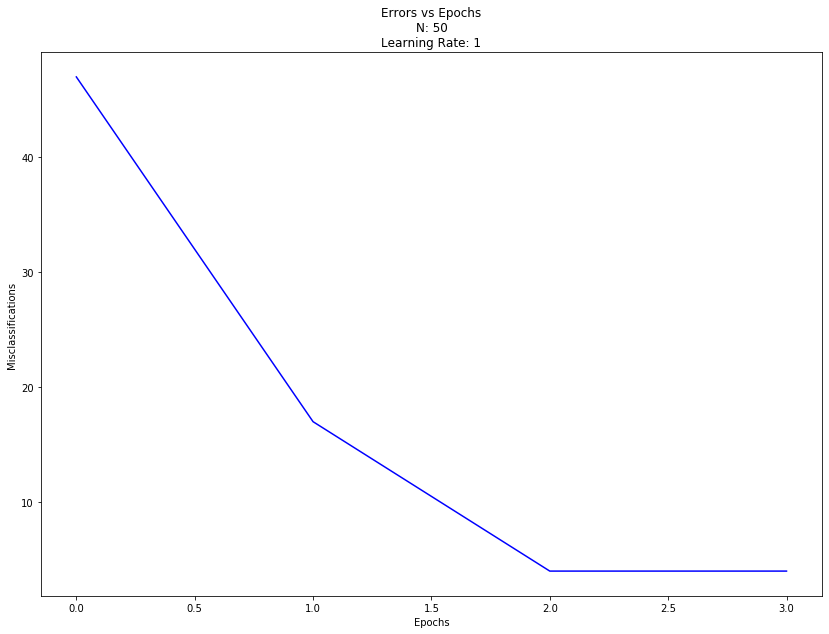

In [6]:
W = np.random.random(size=(10,784))
trained_W = train_weights(W, epoch=0, threshold=0, learning_rate=1, n=50)
test_data(trained_W)

Interrupted
Error to epoch ratio:  0.028
{0: 910, 1: 226, 2: 187, 3: 97, 4: 74, 5: 75, 6: 77, 7: 95, 8: 33, 9: 52, 10: 24, 11: 34, 12: 40, 13: 20, 14: 30, 15: 28}
Number of Errors: 1992
Error Percentage: 19.92%


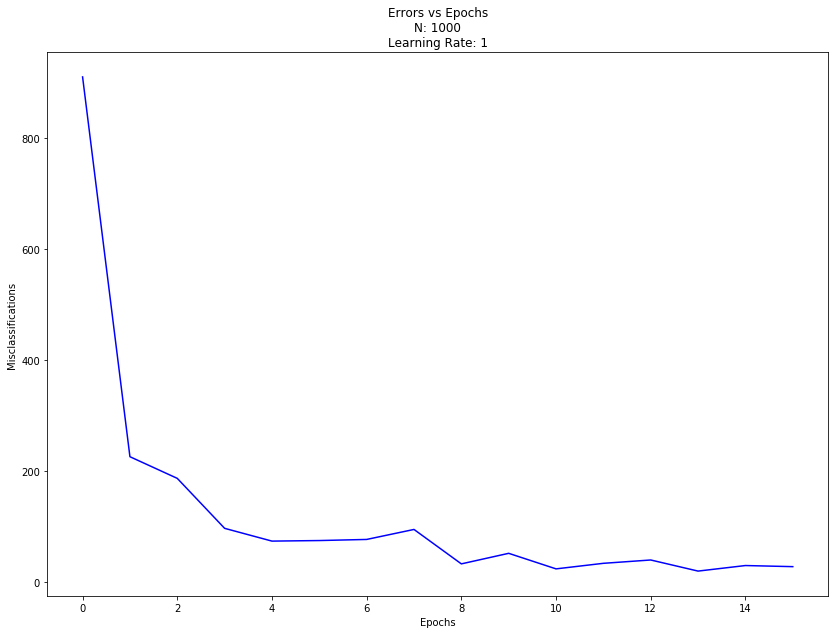

In [7]:
trained_W = train_weights(W, epoch=0, threshold=0, learning_rate=1, n=1000)
test_data(trained_W)


Interrupted
Error to epoch ratio:  0.1511
{0: 55486, 1: 9523, 2: 9894, 3: 10264, 4: 9330, 5: 8720, 6: 8885, 7: 10445, 8: 9399, 9: 10133, 10: 8959, 11: 9402, 12: 8036, 13: 9383, 14: 9632, 15: 9066}
Number of Errors: 1769
Error Percentage: 17.69%


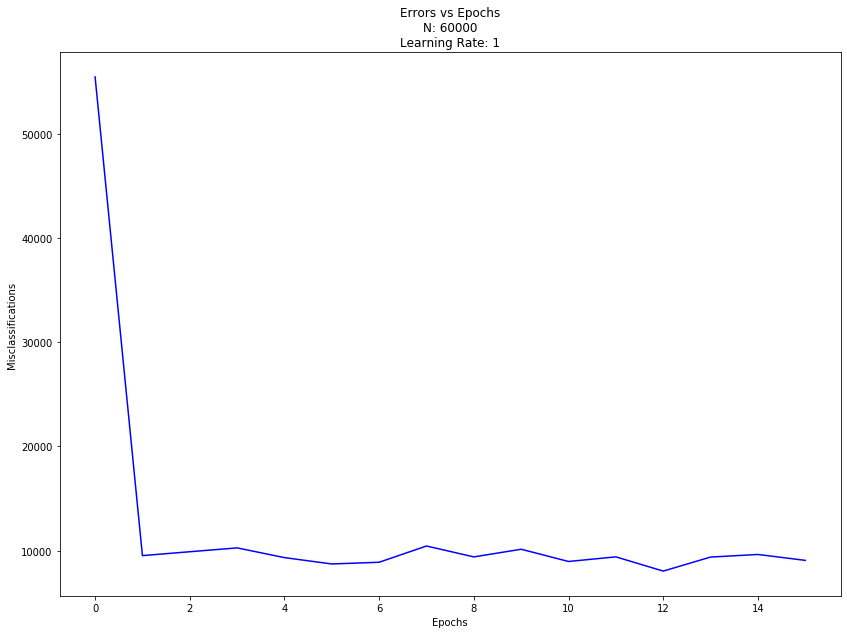

In [8]:
trained_W = train_weights(W, epoch=0, threshold=0, learning_rate=1, n=60000)
test_data(trained_W)

Converged at 26
{0: 50288, 1: 10209, 2: 8642, 3: 8502, 4: 10431, 5: 9376, 6: 9161, 7: 9236, 8: 8932, 9: 9391, 10: 9243, 11: 10379, 12: 9664, 13: 9361, 14: 9652, 15: 9503, 16: 8962, 17: 8970, 18: 10298, 19: 9064, 20: 10201, 21: 9862, 22: 8908, 23: 9132, 24: 8699, 25: 8943, 26: 8357}
Number of Errors: 1460
Error Percentage: 14.6%


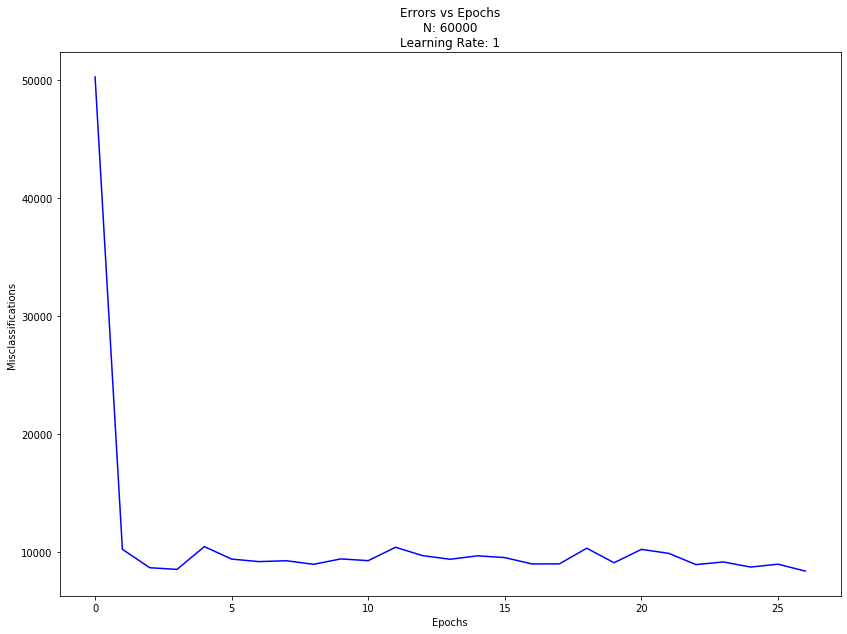

In [9]:
W1 = np.random.random(size=(10,784))
trained_W = train_weights(W1, epoch=0, threshold=0.14, learning_rate=1, n=60000)
test_data(trained_W)


Converged at 29
{0: 51806, 1: 9711, 2: 9858, 3: 10302, 4: 9148, 5: 10630, 6: 9652, 7: 9083, 8: 9608, 9: 8798, 10: 8758, 11: 8974, 12: 9031, 13: 9103, 14: 9096, 15: 9580, 16: 9259, 17: 9435, 18: 9192, 19: 8548, 20: 9444, 21: 8525, 22: 8693, 23: 9679, 24: 9685, 25: 9664, 26: 9592, 27: 8671, 28: 9067, 29: 7933}
Number of Errors: 1367
Error Percentage: 13.67%


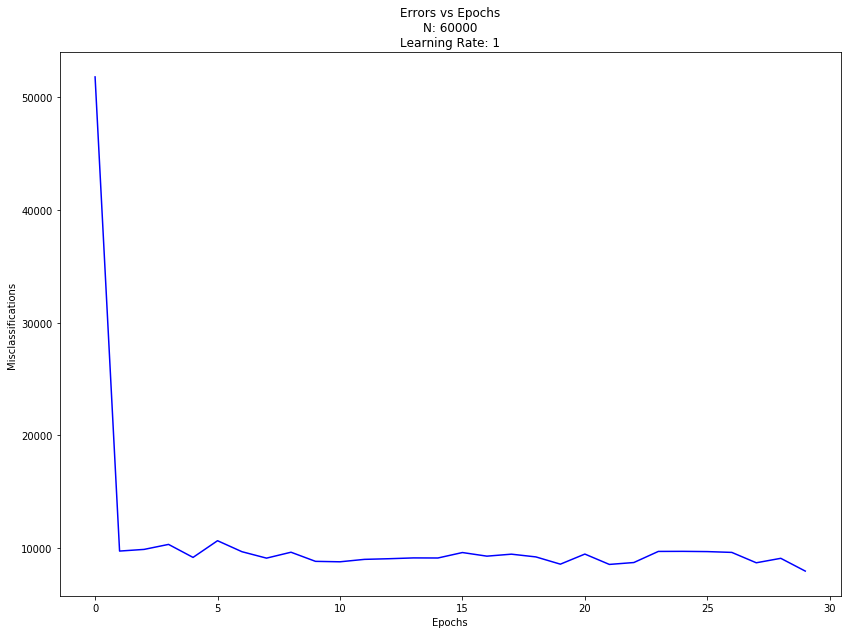

In [10]:
W2 = np.random.uniform(-1,1, size=(10,784))
trained_W = train_weights(W2, epoch=0, threshold=0.14, learning_rate=1, n=60000)
test_data(trained_W)


Converged at 17
{0: 53507, 1: 9866, 2: 8979, 3: 10189, 4: 9637, 5: 9128, 6: 8724, 7: 9942, 8: 9445, 9: 8986, 10: 8957, 11: 8482, 12: 8950, 13: 9890, 14: 9526, 15: 8502, 16: 9150, 17: 8314}
Number of Errors: 1447
Error Percentage: 14.47%


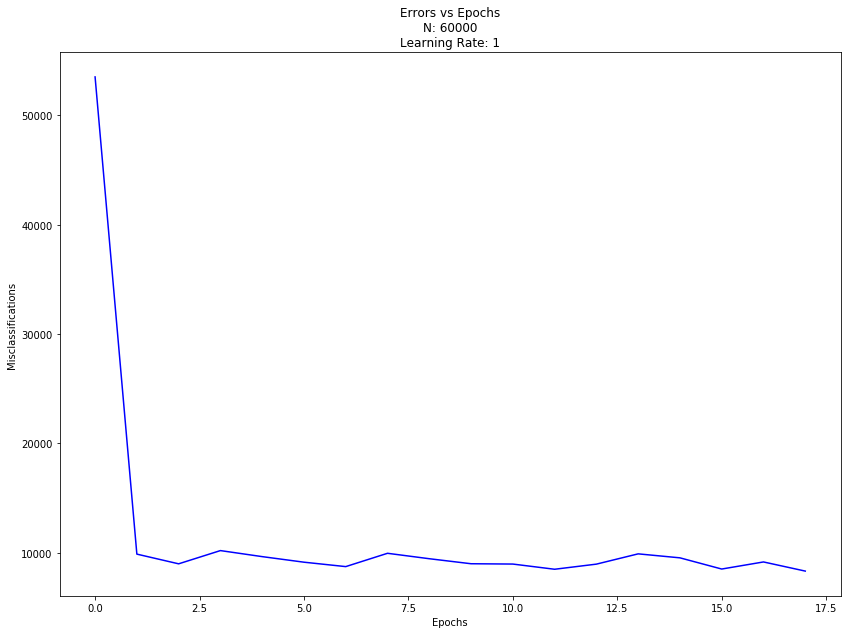

In [11]:
W3 = np.random.random(size=(10,784))
trained_W = train_weights(W3, epoch=0, threshold=0.14, learning_rate=1, n=60000)
test_data(trained_W)

